In [54]:
# Feature selection with RandomForest 

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize

In [55]:
#importing the dataset
dataset =pd.read_csv('combined_csv.csv')
dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [56]:
df = dataset

In [57]:
#dropping columns with zero values
df = df.drop(columns=[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'])

In [58]:
#Taking care of missing values
df = df.dropna(axis=0, how='any')
df.isnull().sum().sum()

0

In [59]:
#replacing inf values with nan
df = df.replace([np.inf, -np.inf], np.nan)
df.isnull().sum().sum()

3018

In [60]:
#dropping nan values
df = df.dropna(axis=0, how='any')
df.isnull().sum().sum()

0

In [66]:
#splitting the dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, 70].values

In [67]:
#Encoding categorical dependent variable
y = pd.get_dummies(y)

In [68]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [69]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_jobs = -1)
RFmodel = classifier.fit(X_train, y_train)

In [71]:
#inspect for feature importance
importances = RFmodel.feature_importances_
importances

array([4.82136981e-02, 4.20470939e-03, 7.55118775e-03, 7.26525840e-03,
       3.98619751e-02, 3.41515010e-02, 2.74369507e-02, 3.50067930e-03,
       2.12418107e-02, 9.71867229e-03, 3.79299176e-02, 1.16767584e-02,
       3.47921426e-02, 3.98979564e-02, 1.01327804e-02, 7.69477165e-03,
       9.63329821e-03, 4.45782292e-03, 1.64551135e-02, 5.52086496e-03,
       5.49372142e-03, 8.02258658e-03, 1.08819454e-02, 7.68532548e-03,
       1.10260266e-02, 1.44427026e-03, 1.59779857e-03, 1.85733329e-03,
       1.37725172e-03, 2.20504820e-03, 6.10722467e-04, 1.29430853e-05,
       1.84370697e-02, 2.09677851e-02, 8.04454666e-03, 1.01022888e-02,
       4.80827929e-03, 2.66284081e-02, 1.90311031e-02, 6.29517619e-02,
       5.26026151e-02, 2.86914805e-03, 4.97907720e-04, 0.00000000e+00,
       1.47657048e-02, 5.75186438e-03, 2.32749440e-03, 1.03185953e-05,
       2.90764766e-08, 2.39418114e-03, 3.44790500e-02, 2.07905728e-02,
       4.23878102e-02, 2.26800467e-02, 1.34537535e-02, 2.83329492e-02,
      

Feature ranking:
1. feature 39 (0.062952)
2. feature 40 (0.052603)
3. feature 0 (0.048214)
4. feature 57 (0.045285)
5. feature 52 (0.042388)
6. feature 13 (0.039898)
7. feature 4 (0.039862)
8. feature 10 (0.037930)
9. feature 12 (0.034792)
10. feature 50 (0.034479)
11. feature 5 (0.034152)
12. feature 55 (0.028333)
13. feature 6 (0.027437)
14. feature 37 (0.026628)
15. feature 58 (0.026094)
16. feature 53 (0.022680)
17. feature 8 (0.021242)
18. feature 33 (0.020968)
19. feature 51 (0.020791)
20. feature 38 (0.019031)
21. feature 32 (0.018437)
22. feature 18 (0.016455)
23. feature 44 (0.014766)
24. feature 54 (0.013454)
25. feature 60 (0.013196)
26. feature 61 (0.012757)
27. feature 59 (0.012459)
28. feature 68 (0.011950)
29. feature 11 (0.011677)
30. feature 24 (0.011026)
31. feature 22 (0.010882)
32. feature 56 (0.010156)
33. feature 14 (0.010133)
34. feature 35 (0.010102)
35. feature 9 (0.009719)
36. feature 16 (0.009633)
37. feature 34 (0.008045)
38. feature 21 (0.008023)
39. featur

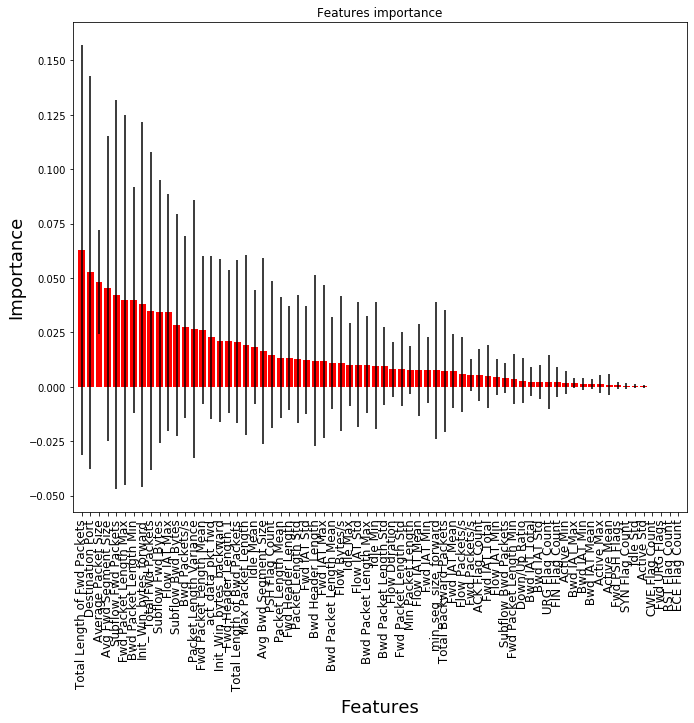

In [72]:
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
f, ax = plt.subplots(figsize=(11, 9))
#plt.figure()
plt.title("Features importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names)
plt.xticks(rotation=90, fontsize = 12)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("Importance", fontsize = 18)
plt.xlabel("Features", fontsize = 18)
plt.show()

In [40]:
#label column as feature names
df2 = df.columns
feat = df2.values
feat_names = feat.tolist()
feat_names
feature_names = [feat_names[i] for i in indices]

In [49]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(classifier, threshold=0.01)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
 

In [50]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_names[feature_list_index])

 Destination Port
 Flow Duration
 Total Fwd Packets
 Total Backward Packets
Total Length of Fwd Packets
 Total Length of Bwd Packets
 Fwd Packet Length Max
 Fwd Packet Length Min
 Fwd Packet Length Mean
 Fwd Packet Length Std
Bwd Packet Length Max
 Bwd Packet Length Min
 Bwd Packet Length Mean
 Bwd Packet Length Std
Flow Bytes/s
 Flow Packets/s
 Flow IAT Mean
 Flow IAT Std
 Flow IAT Max
 Flow IAT Min
Fwd IAT Total
 Fwd IAT Mean
 Fwd IAT Std
 Fwd IAT Max
 Fwd IAT Min
Bwd IAT Total
 Bwd IAT Mean
 Bwd IAT Std
 Bwd IAT Max
 Bwd IAT Min
Fwd PSH Flags
 Fwd Header Length
 Bwd Header Length
Fwd Packets/s
 Bwd Packets/s
 Min Packet Length
 Max Packet Length
 Packet Length Mean
 Packet Length Std
 Packet Length Variance
FIN Flag Count
 PSH Flag Count
 ACK Flag Count
 URG Flag Count
 Down/Up Ratio
 Average Packet Size
 Avg Fwd Segment Size
 Avg Bwd Segment Size
 Fwd Header Length.1
Subflow Fwd Packets
 Subflow Fwd Bytes
 Subflow Bwd Packets
 Subflow Bwd Bytes
Init_Win_bytes_forward
 Init_Win_byte